<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/fluidcharacterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Introduction to fluid characterization
#@markdown This section gives an introdution to fluid characterization of oil and gas.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

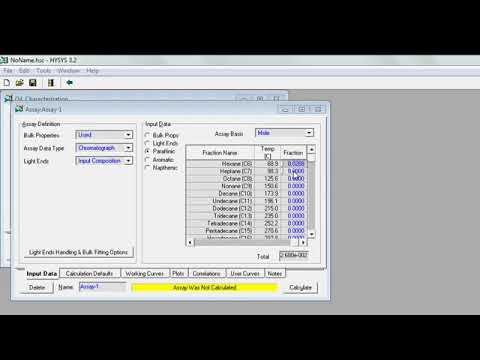

In [6]:
#@title Introduction to fluid characterization in HYSYS
#@markdown This video gives an introduction introduction to fluid characterization in HYSYS
from IPython.display import YouTubeVideo
YouTubeVideo('OEPnWpa2ikg', width=600, height=400)

#Tuning the molar mass of a plus fraction to reservoir conductions
Phase Envelope (two-phase region): The region enclosed by the bubble-point curve and the dew point curve wherein gas and liquid coexist in equlibrium, is identified as the phase envelope of the hydrocarbon system. A gas reservoir is dominated by light components, and generally contain low amounts of C7+ components. 

In the example below we tune the molar mass of the plus fraction to match reservoir pressure and temperature conditions.

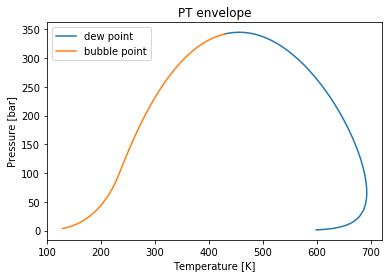

In [7]:
nitrogen = 0.51 #@param {type:"number"}
CO2 = 2.51 #@param {type:"number"}
methane = 20.0  #@param {type:"number"}
ethane = 4.01  #@param {type:"number"}
propane =  3.01 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.25 #@param {type:"number"}
npentane = 0.25 #@param {type:"number"}
nhexane =  0.125 #@param {type:"number"}
C7 =  4.05 #@param {type:"number"}
C7Molarmass =  210.0 #@param {type:"number"}
C7Density =  810.2 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", npentane)
fluid1.addComponent("n-hexane", nhexane)
fluid1.addPlusFraction("C7", C7, C7Molarmass/1000.0, C7Density/1000.0)
fluid1.getCharacterization().characterisePlusFraction()
fluid1.setMixingRule('classic')

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

In [10]:
fluid1.setTemperature(630.0, "K")
fluid1.setPressure(200.0), "bara"
saturationTemperature = dewt(fluid1)
print('saturation temperature ', saturationTemperature, ' K')

saturation temperature  645.1063568644008  K
